# Activity 1:
1. Discuss the importance of data visualization in data analysis and decision-making.

- Simplification of Complex Data: Visualizations distill this data into more comprehensible formats -> easier for stakeholders to grasp key insights.

- Pattern Recognition: identifying trends, patterns, and outliers that might not be apparent in raw data -> more accurate predictions and insights.

- Enhanced Communication: Visualizations are a powerful tool for communicating data insights clearly and effectively to a diverse audience, including those who may not have a strong background in data analysis.

- Informed Decision-Making: By presenting data in a visual format, decision-makers can quickly understand the implications of the data, compare alternatives, and make decisions backed by evidence.

- Increased Engagement: Visual data is often more engaging and memorable than text-based data, which can help in retaining the attention of stakeholders and facilitating better discussions.

2. Discuss the principles of effective data visualization, including clarity, accuracy, and storytelling.

- Clarity: The visualization should be easily understandable at a glance. This involves using appropriate chart types, labels, and legends to ensure that the data's meaning is clear.

- Accuracy: The data should be represented truthfully without misleading distortions. This includes maintaining proportionality in charts and avoiding visual manipulations that can mislead the viewer.

- Storytelling: A good visualization tells a story. It should have a clear narrative that guides the viewer through the data, highlighting the most important insights and providing context.

3. Show examples of well-designed visualizations and discuss their impact.

## Description

Dataset: Greenhouse gas giants

Carbon Majors Data has the following features:

- Open Source: The data is available for download as CSV files for non-commercial use. InfluenceMap's Terms and Conditions apply.

- Annual Updates: The data is updated annually in November, and the downloads represent the latest available data.

Levels of Data Granularity:

1. Low Granularity: Includes year, entity, entity type, and total emissions.

2. Medium Granularity: Includes year, entity, entity type, commodity, commodity production, commodity unit, and total emissions.

3. High Granularity: Includes the same fields as the medium granularity file, as well as the reporting entity, data point source, product emissions, and four different operational emissions: flaring, venting, own fuel use, and fugitive methane.

=> Choose emissions_medium_granularity file


In [2]:
import pandas as pd
raw = pd.read_csv("emissions_medium_granularity.csv")
print(f"Total raw data: {raw.shape}\n")
raw.head(5)

Total raw data: (12551, 7)



,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


Dataset has 12551 examples and 7 features

Explain features:
- year: The year of the data point
- parent_entity: The entity to whom the emissions are traced to (fuel distributor,fuel company,...)
- parent_type: investor-owned company/state-owned entity/nation state.
- commodity
- production_value: The quantity of production
- production_unit: The unit of production
- total_emissions_MtCO2e: The total emissions

In [17]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


The dataset has no null values.

In [29]:
# Show the amount of unique value in each column
dataset_without_total_column = raw.drop(columns=["total_emissions_MtCO2e","production_value"])
for column in dataset_without_total_column.columns:
    unique_value = dataset_without_total_column[column].unique()
    num_unique = len(unique_value)
    print(f"{column}: {num_unique} unique values")
    if num_unique < 10:
        print(unique_value)
    print("\n")

year: 169 unique values


parent_entity: 122 unique values


parent_type: 3 unique values
['State-owned Entity' 'Investor-owned Company' 'Nation State']


commodity: 9 unique values
['Oil & NGL' 'Natural Gas' 'Sub-Bituminous Coal' 'Metallurgical Coal'
 'Bituminous Coal' 'Thermal Coal' 'Anthracite Coal' 'Cement'
 'Lignite Coal']


production_unit: 4 unique values
['Million bbl/yr' 'Bcf/yr' 'Million tonnes/yr' 'Million Tonnes CO2']




# Activity 4,5,6: Create, customize visualization and present insights

### 1. Bar chart

Bar chart depicting the total production of each type of oil and natural gas liquids (ONGL) from 1850 to the present.

In [11]:
# Calculate the total amount of production value of each commodity
group_data_by_commodity = raw.groupby(raw['commodity'])['production_value'].sum().reset_index()
print(group_data_by_commodity)

             commodity  production_value
0      Anthracite Coal      1.627872e+04
1      Bituminous Coal      1.218675e+05
2               Cement      5.663804e+04
3         Lignite Coal      3.187816e+04
4   Metallurgical Coal      2.951517e+04
5          Natural Gas      3.555407e+06
6            Oil & NGL      1.324404e+06
7  Sub-Bituminous Coal      2.466162e+04
8         Thermal Coal      1.930153e+04


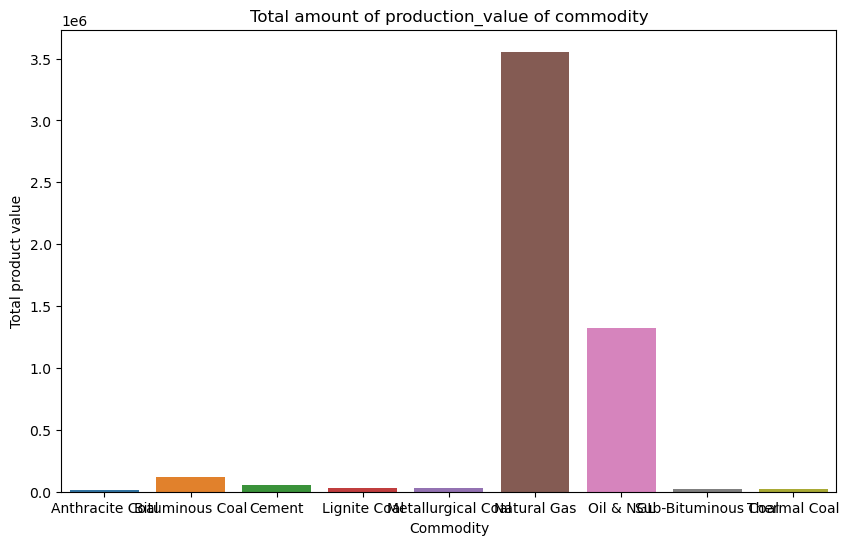

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data
plt.figure(figsize=(10,6))
sns.barplot(x='commodity', y='production_value', data=group_data_by_commodity)

plt.title('Total amount of production_value of commodity')
plt.xlabel('Commodity')
plt.ylabel('Total product value')

plt.show()


Natural gas and oil & NGL have significantly higher total production compared to other products, so using a logarithmic scale makes it easier to observe while maintaining the order of product production and changing the colors for better aesthetics.

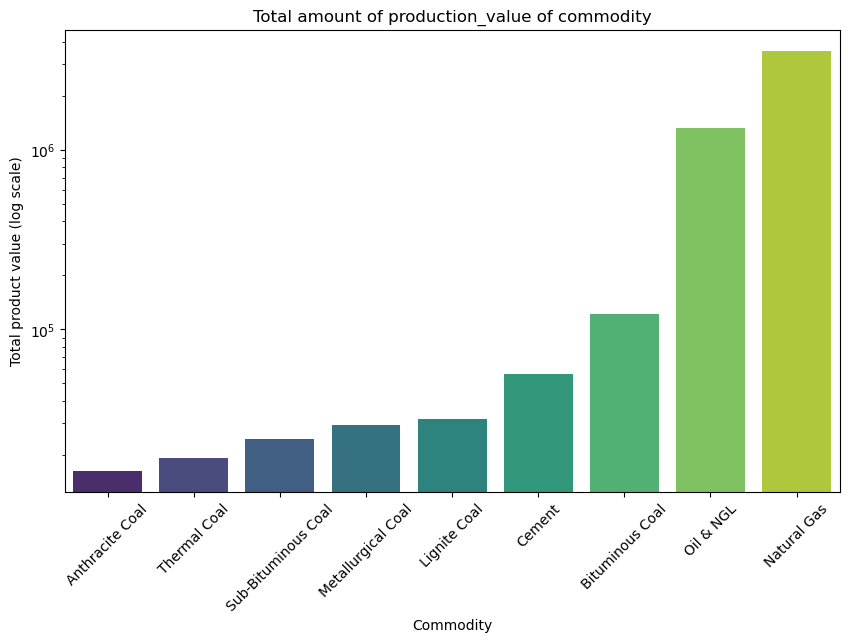

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

data_sorted = group_data_by_commodity.sort_values(by="production_value", ascending=True) # decrease by production_value

plt.figure(figsize=(10,6))
sns.barplot(x='commodity', y='production_value', data=data_sorted, palette='viridis')

plt.yscale('log') # Log scale

plt.title('Total amount of production_value of commodity')
plt.xlabel('Commodity')
plt.ylabel('Total product value (log scale)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alternatively, you can present it in the style below for easier observation.

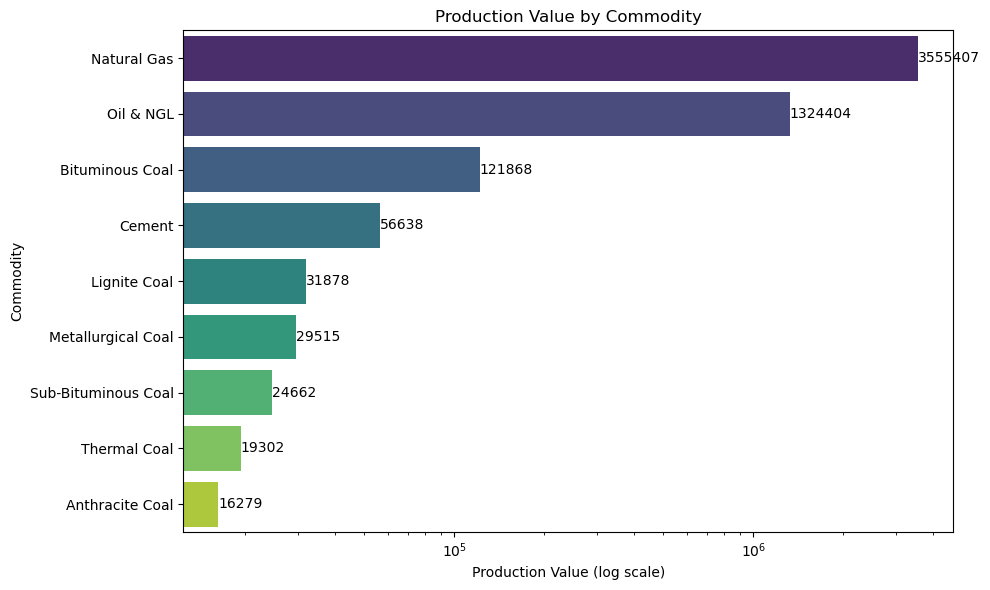

In [65]:
data_sorted = group_data_by_commodity.sort_values(by="production_value", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='production_value', y='commodity', data=data_sorted, palette='viridis')

plt.xscale('log')

plt.xlabel('Production Value (log scale)')
plt.ylabel('Commodity')
plt.title('Production Value by Commodity')

for index, value in enumerate(data_sorted['production_value']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.tight_layout()
plt.show()


In [7]:
data_pvt = raw.pivot_table(values = ["production_value", "total_emissions_MtCO2e"], index = "year", aggfunc = "sum").reset_index()
data_pvt.head()

,year,production_value,total_emissions_MtCO2e
0,1854,0.051005,0.099198
1,1855,0.066326,0.128996
2,1856,0.081647,0.158793
3,1857,0.094906,0.184580
4,1858,0.108165,0.210367


### 2. Scatter plot

The chart illustrates the correlation between the amount of ONGL products and the amount of CO2 emissions released into the environment.

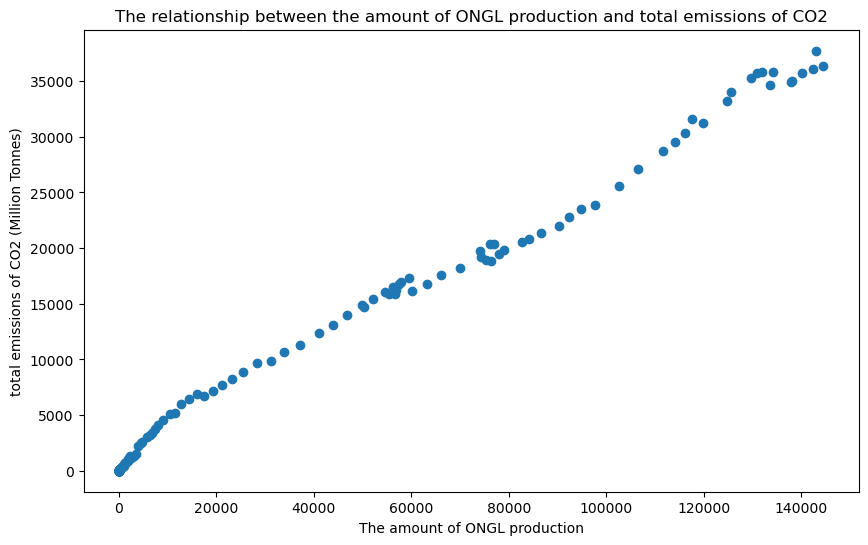

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(data_pvt['production_value'],data_pvt['total_emissions_MtCO2e'])

plt.title("The relationship between the amount of ONGL production and total emissions of CO2")
plt.xlabel("The amount of ONGL production")
plt.ylabel("total emissions of CO2 (Million Tonnes)")

plt.show()

The total production of oil and natural gas liquids is directly proportional to the amount of CO2 emissions, and this trend holds true for each.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(data_pvt['production_value'],data_pvt['total_emissions_MtCO2e'])
plt.title("The relationship between the amount of ONGL production and total emissions of CO2")
plt.xlabel("The amount of ONGL production")
plt.ylabel("total emissions of CO2 (Million Tonnes)")
plt.show()

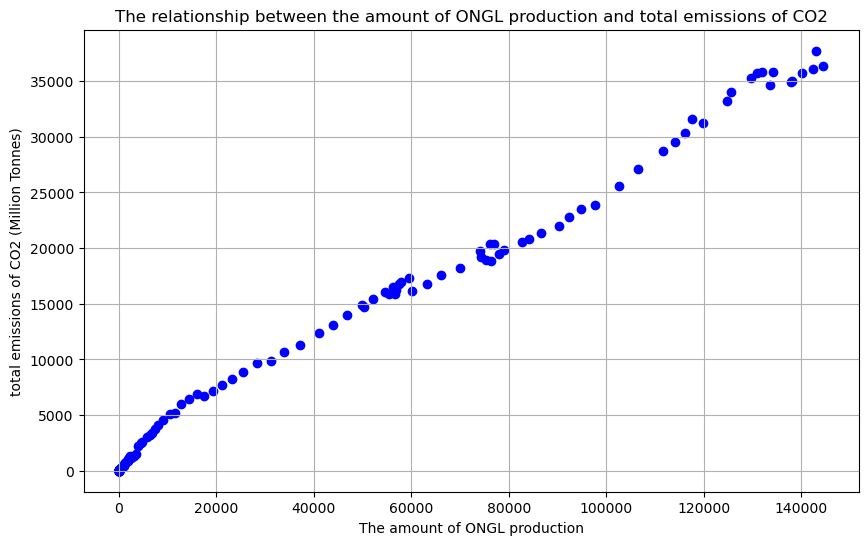

In [9]:
# scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(data_pvt['production_value'],data_pvt['total_emissions_MtCO2e'],color='blue', marker='o')

plt.title("The relationship between the amount of ONGL production and total emissions of CO2")
plt.xlabel("The amount of ONGL production")
plt.ylabel("total emissions of CO2 (Million Tonnes)")

plt.grid(True)
plt.show()

### 3. Line chart
The line chart illustrates the growth rate of the average ONGL product quantity and CO2 emissions on a yearly basis. Additionally, it depicts the correlation between these two factors and delves deeper into analyzing how their correlation changes over the years.

In [10]:
# Create pivot mean table
data_pvt = raw.pivot_table(values = ["production_value", "total_emissions_MtCO2e"], index = "year", aggfunc = "mean").reset_index()
data_pvt.head()

,year,production_value,total_emissions_MtCO2e
0,1854,0.017002,0.033066
1,1855,0.022109,0.042999
2,1856,0.027216,0.052931
3,1857,0.031635,0.061527
4,1858,0.036055,0.070122


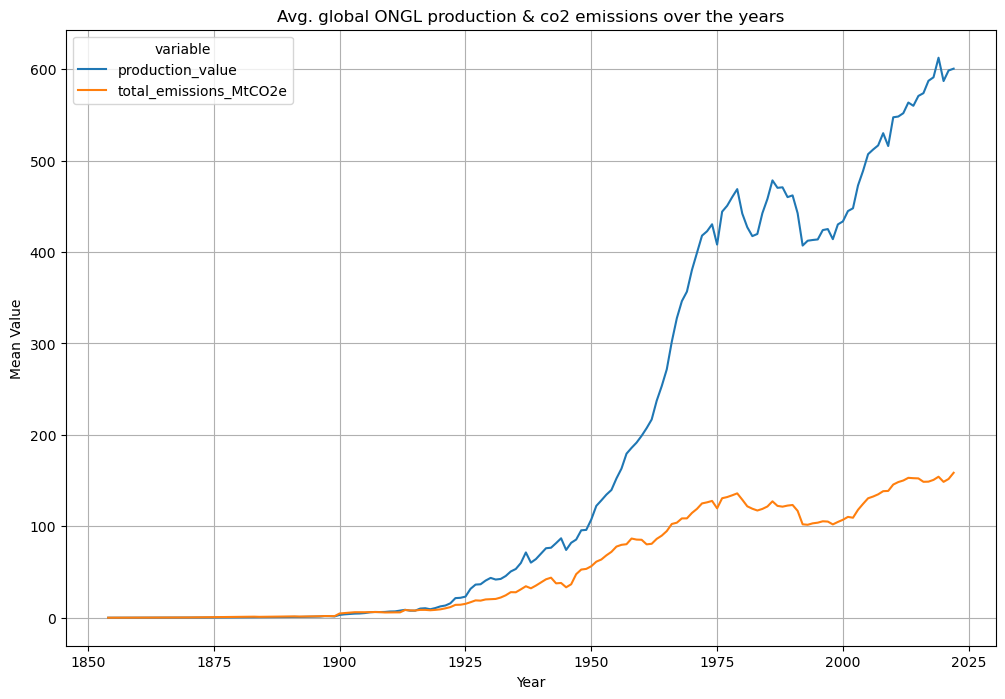

In [13]:
# Plot data
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,8))

chart = sns.lineplot(x='year', 
                    y='value',
                    hue='variable',
                    data=pd.melt(data_pvt,['year']),
                    color=sns.color_palette()[0],)

chart.set(xlabel='Year', ylabel='Mean Value')
plt.title('Avg. global ONGL production & co2 emissions over the years')

plt.grid(True)
plt.show()

*** The correlation ***: 

The total production of ONGL is directly proportional to the amount of CO2 emissions, but the correlation between these two factors varies from year to year. Specifically, ONGL production increases rapidly over time, while CO2 emissions increase but at a much slower pace. 

There could be several different reasons:

- Increased energy efficiency
- Energy conversion and the use of alternative fuels
- Carbon Capture and Storage (CCS)
- Environmental policies and regulations
- Structural changes in the energy industry

*** The growth rate ***:
- The ONGL production began to increase around the 1880s following the establishment of Edison's electric company, Edison Electric Light Company, in 1882.
- During the oil crises of 1973-1974 and 1979-1980, the decrease in oil production and price hikes led to a significant decline in ONGL production in the 1970s. After a period of instability, production began to stabilize and increase again. During this time, CO2 emissions also decreased. In 1997, countries that signed the Kyoto Protocol committed to reducing greenhouse gas emissions. Additionally, advancements in machinery efficiency and the emergence of new technologies contributed to a significant reduction in CO2 emissions.
- 2008-2009 Global Financial Crisis: The global financial crisis resulted in a decrease in energy demand and reduced production across various energy sources, including oil and natural gas. Following a slight decline, production then rebounded rapidly.